# ANÁLISIS EXPLORATIOR DE DATOS (EDA)

En este notebook se realiza el análisis exploratorio del dataset **Bank Customer Churn Prediction**, el cual consiste en conocer y enterder los datos con los que se va a trabajar.

Durante esta fase, se intenta responder a las siguientes cuestiones:
- ¿Cuántos registros tiene el conjunto?
- ¿Están todas las filas completas o hay campos con valores nulos?
- ¿De que naturaleza son los datos? (cualitativos o cuantitativos)
- ¿Cuál es la variable target? (la variable a predecir)
- ¿Qué distribución siguen las variables?
- ¿Existe algún tipo de relación entre las variables (correolación)?
- ¿Son todas las variables igual de importantes para la varibale target?



## Configuración inicial

** Import lirberías **

In [48]:
import os
import numpy as np
import pandas as pd
import seaborn as sns


from matplotlib import pyplot as plt
from eda_module import *


** Carga del dataset **

In [49]:
file_path = (os.path.dirname(os.getcwd()) + '/data/')
print(file_path)
data = pd.read_csv(file_path + '/Bank_Customer_Churn_Prediction.csv')

c:\TFG\TFG_ADE/data/


## Presentación de dataset

### Código

In [50]:
print('Cantidad de filas y columnas del dataset: ', data.shape)
print('\n')
print('Nombre columnas: ')
data.columns.values.tolist()

Cantidad de filas y columnas del dataset:  (10000, 12)


Nombre columnas: 


['customer_id',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [52]:
#Visualizar las primeras filas del dataset
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
#Comprobación de valores nulos en los datos
print('Cantidad de valores nulos: ')
data.isnull().sum()

Cantidad de valores nulos: 


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [54]:
#Comprobación de valores duplicados
print('Número de registros duplicados: ', data.duplicated().sum())

Número de registros duplicados:  0


In [55]:
data['customer_id'].nunique()

10000

### Conlusiones
El dataset contiene **10.000** registros y tiene **12** columnas

Las variables son:

- customer_id (cuantitativa discreta): número de cuenta del cliente -> **NO SE USA**
- credit_score: (cuantitativa discreta): calificación crediticia del cliente
- country (cualitativa/categorica nominal): país de residencia del cliente
- gender (cualitativa/categorica nominal): sexo del cliente
- age (cuantitativa discreta): edad del cliente
- tenure (cuantitativa discreta): número de años que el cliente tiene una cuenta en el banco ABC
- balance (cuantitaiva continua): el saldo de la cuenta del cliente
- products_number (cuantitativa discreta): número de productos que tiene el cliente del banco
- credit_card (cualitativa/categorica binario): si el cliente tiene una tarjeta de crédito  
- active_member (cualitativa/categorica binario): si el cliemnte es un miembro activo del banco
- estimated_salary (cuantitativa continuo): el salario del cliente
- churn (cualitativa/categorica binario) : **VARIABLE TARGET**. 1 si el cliente ha abandonado el banco durante algún periodo y 0 si no ha abanadonado el banco.

Se ha comprobado que no hay valores nulos en las variables. Tanpoco hay filas repetidas en el conjunto de datos.

## Distribución de las variables

### Análisis univariante

In [109]:
stats_order = ['mean', 'std', 'max', 'min','25%', '50%', '75%']
data[['age','tenure', 'balance', 'estimated_salary','credit_score','products_number']].describe().loc[stats_order].T

,mean,std,max,min,25%,50%,75%
age,38.9218,10.487806,92.0,18.0,32.00,37.0,44.00
tenure,5.0128,2.892174,10.0,0.0,3.00,5.0,7.00
balance,76485.5715,62397.185107,250898.0,0.0,0.00,97198.0,127643.75
estimated_salary,100089.7484,57510.491042,199992.0,11.0,51001.75,100193.5,149387.75
credit_score,650.5288,96.653299,850.0,350.0,584.00,652.0,718.00
products_number,1.5302,0.581654,4.0,1.0,1.00,1.0,2.00


In [57]:
#seleccionar el color de la paleta
sns.color_palette("pastel")


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [58]:
print(sns.color_palette("pastel").as_hex())
sns.set_theme(style="darkgrid")

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


([<matplotlib.patches.Wedge at 0x21071d77690>,
 [Text(-0.6568642010431011, -0.8823431426537006, 'No Chun'),
  Text(0.6568642010431012, 0.8823431426537006, 'Churn')],
 [Text(-0.3582895642053278, -0.4812780778111093, '79.6%\n(7962)'),
  Text(0.35828956420532787, 0.4812780778111093, '20.4%\n(2037)')])

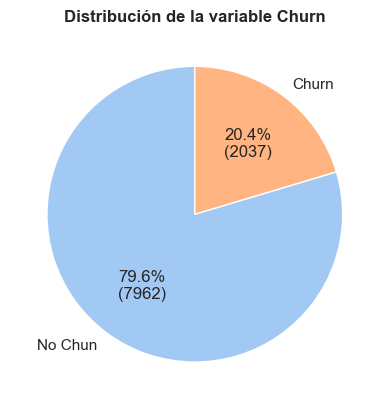

In [95]:
#print(data['churn'].value_counts())

n_churn = data['churn'].value_counts()
plt.figure()
plt.title('Distribución de la variable Churn', fontweight = 'bold')

plt.pie(n_churn,
        labels=['No Chun','Churn'],
        autopct=lambda pct: pie(pct,n_churn),
        startangle=90,
        colors=('#a1c9f4','#ffb482'))

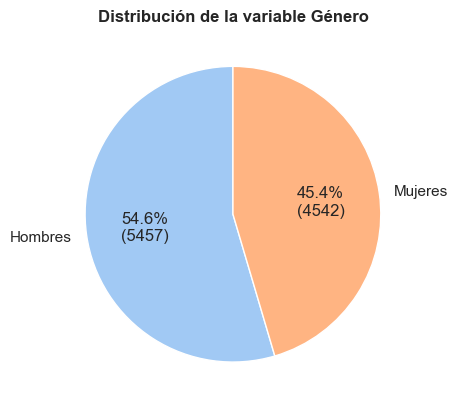

In [60]:
n_gender = data['gender'].value_counts()
plt.figure()
plt.title('Distribución de la variable Género', fontweight = 'bold')

plt.pie(n_gender,
        labels=['Hombres','Mujeres'],
        autopct=lambda pct: pie(pct,n_gender),
        startangle=90,
        colors=('#a1c9f4','#ffb482'));

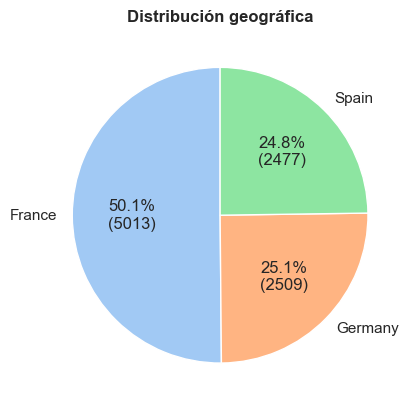

In [98]:
n_country = data['country'].value_counts()
plt.figure()
plt.title('Distribución geográfica', fontweight = 'bold')

plt.pie(n_country,
        labels=['France','Germany','Spain'],
        autopct=lambda pct: pie(pct,n_country),
        startangle=90,
        colors=('#a1c9f4','#ffb482','#8de5a1'));

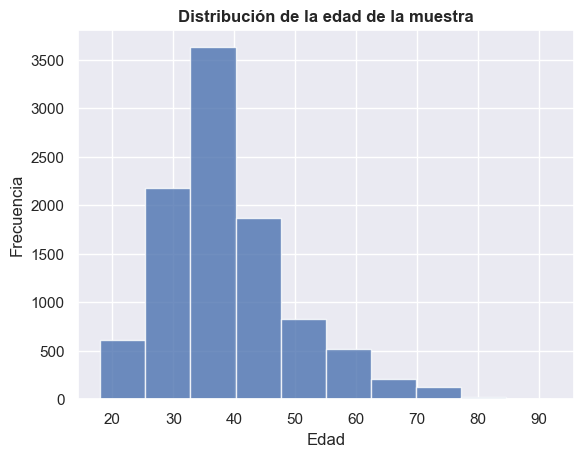

In [102]:
data['age'].hist(alpha=0.8)

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad de la muestra', fontweight = 'bold');

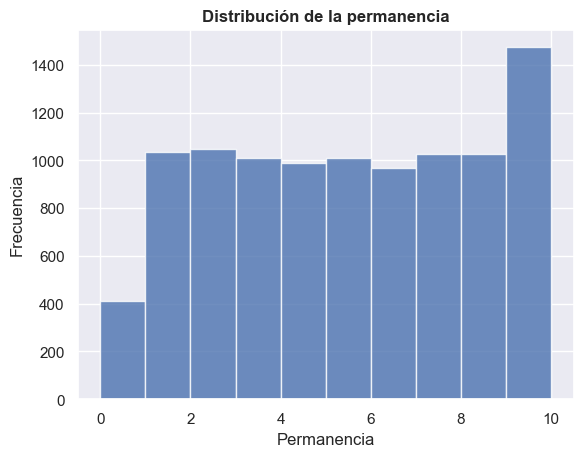

In [103]:
data['tenure'].hist(alpha=0.8)

plt.xlabel('Permanencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de la permanencia', fontweight = 'bold');

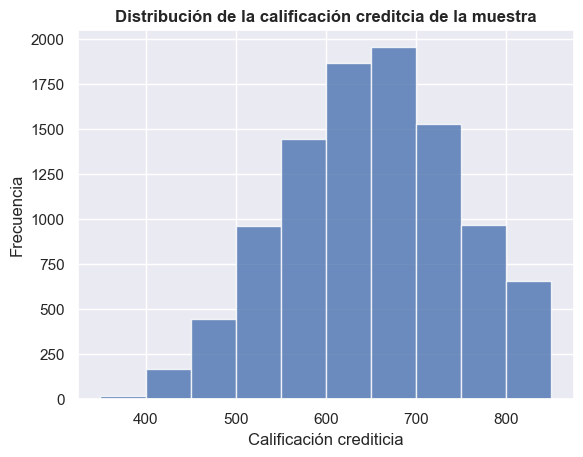

In [104]:
data['credit_score'].hist(alpha=0.8)

plt.xlabel('Calificación crediticia')
plt.ylabel('Frecuencia')
plt.title('Distribución de la calificación creditcia de la muestra', fontweight = 'bold');

### Análisis multivariante

Transformar las variables categoricas a numéricas

In [106]:
data['country'] = data['country'].map({'France': 0, 'Spain' : 1,'Germany':2})
data['gender'] = data['gender'].map({'Male': 0, 'Female' : 1})
data['balance']=data['balance'].astype(int)
data['estimated_salary']=data['estimated_salary'].astype(int)

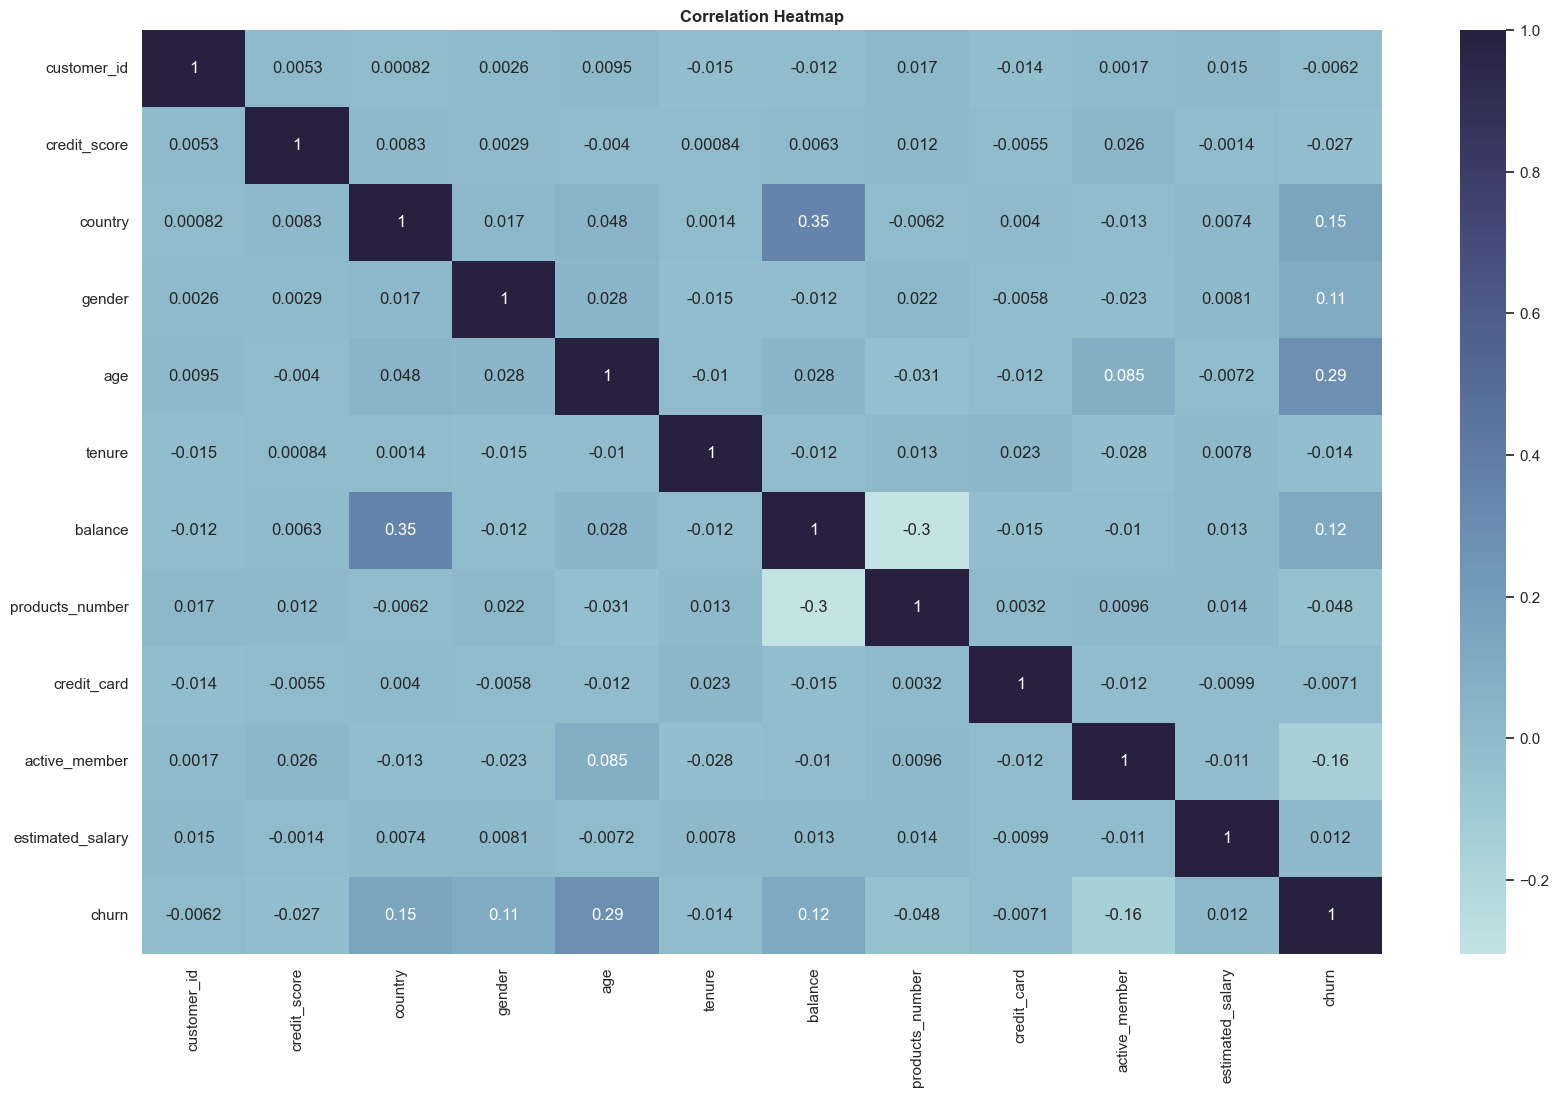

In [107]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Correlation Heatmap', fontweight = 'bold')
plt.show()